<a href="https://colab.research.google.com/github/riorio214/fire/blob/main/fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

📌 데이터프레임 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5675 entries, 0 to 5674
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   날짜             5675 non-null   object 
 1   시도             5675 non-null   object 
 2   시군구            5675 non-null   object 
 3   읍면동            5675 non-null   object 
 4   발화원인           5675 non-null   object 
 5   착화원인           5675 non-null   object 
 6   인명피해           5675 non-null   int64  
 7   재산피해           5675 non-null   int64  
 8   기온             5674 non-null   float64
 9   풍향             5675 non-null   object 
 10  풍속             5675 non-null   object 
 11  습도             5675 non-null   float64
 12  연도             5675 non-null   int64  
 13  출동시간           5675 non-null   int64  
 14  진화시간           5675 non-null   int64  
 15  가스누출건수         5675 non-null   int64  
 16  전기화재건수         5675 non-null   int64  
 17  전기사고피해금액       5675 non-null   int64  
 

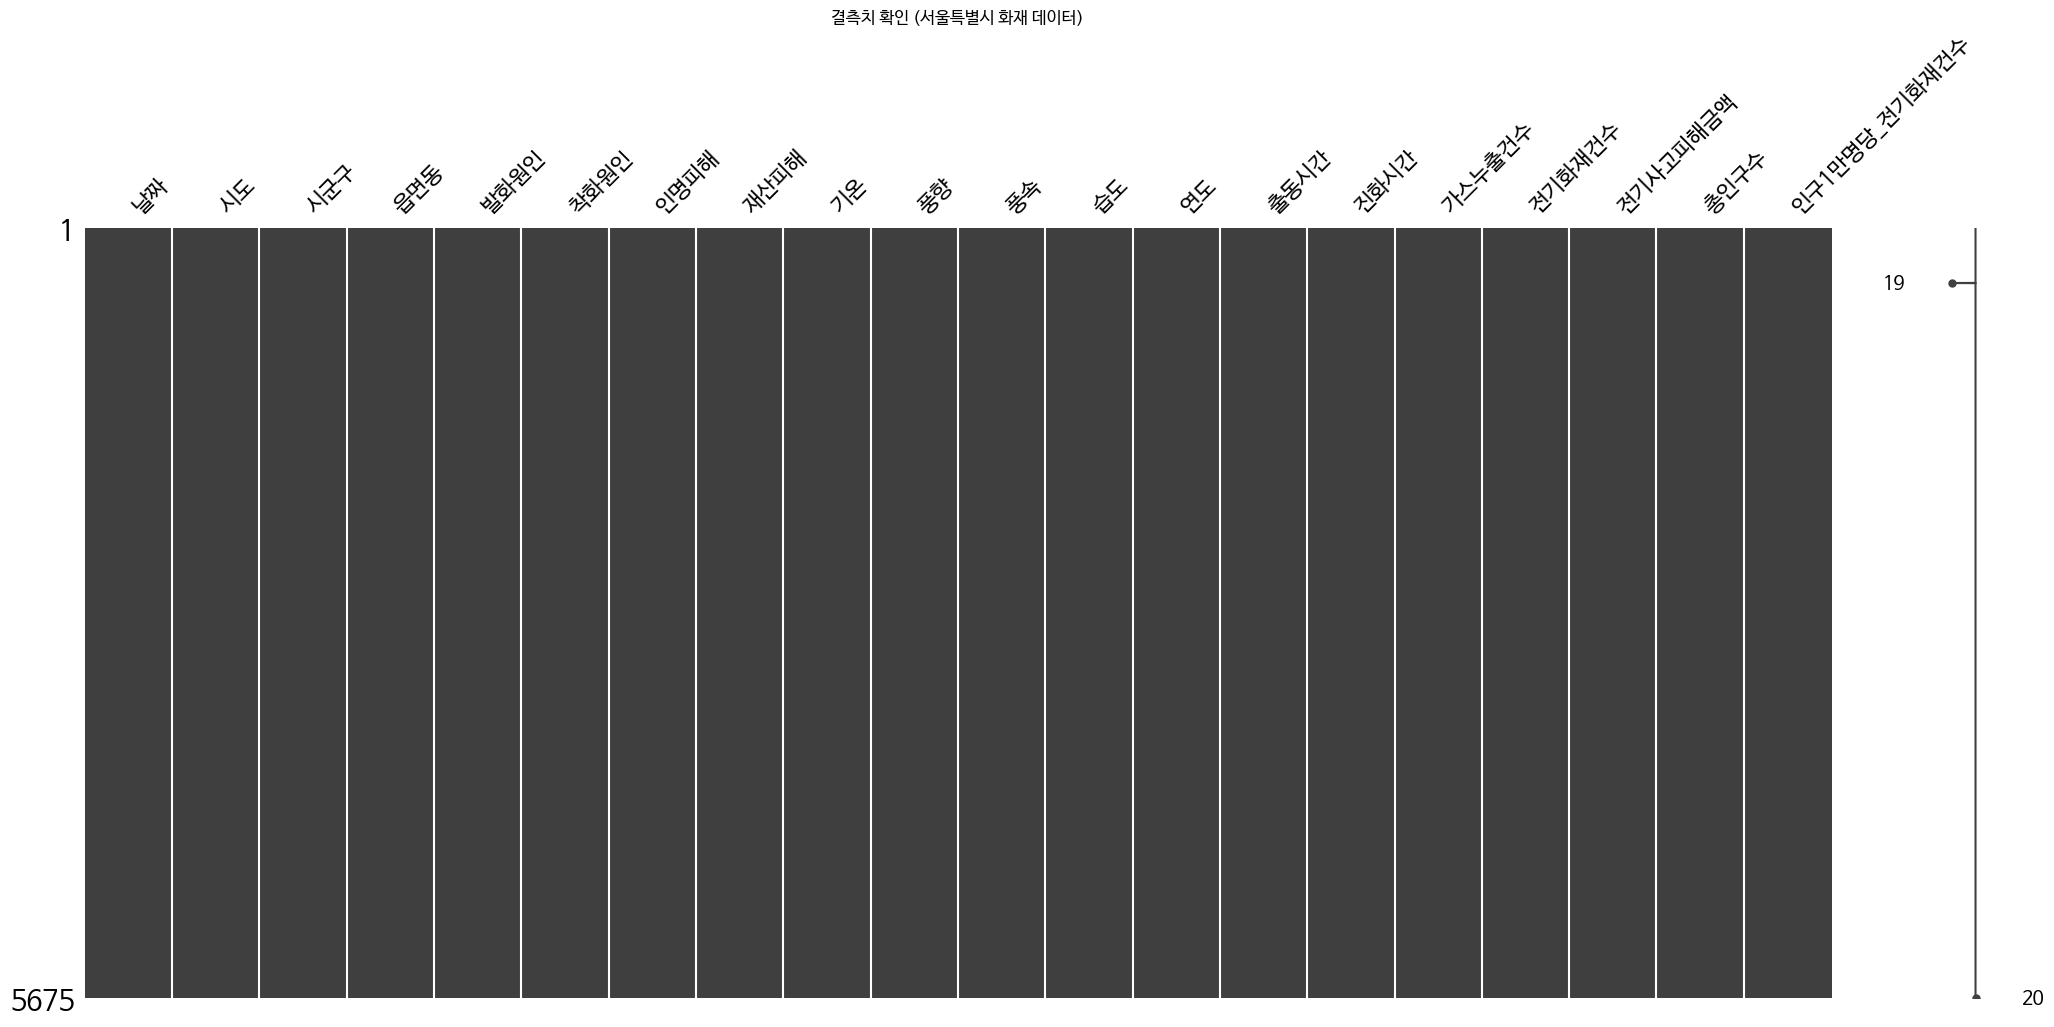

/tmp/ipython-input-2450760883.py:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


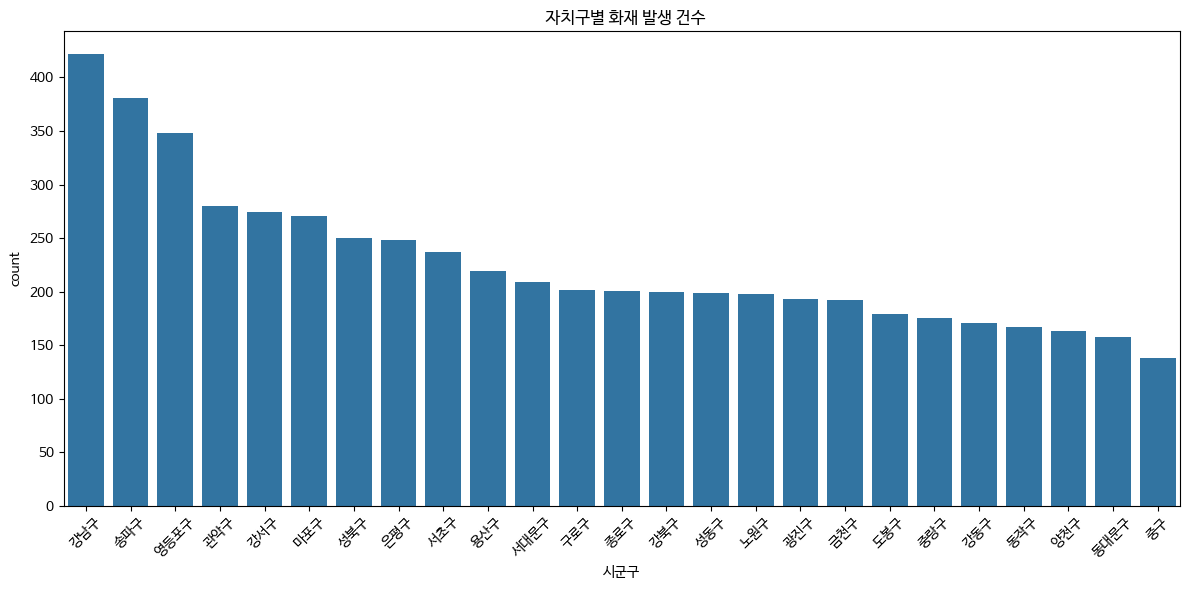

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


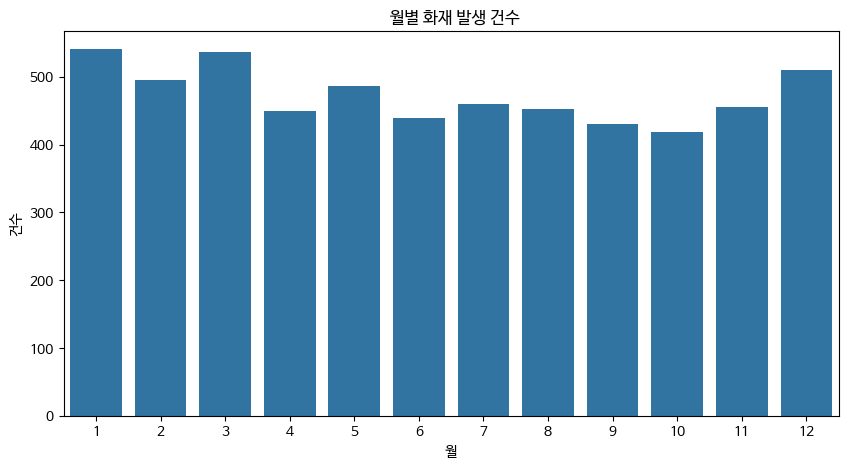

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128658 (\N{FIRE ENGINE}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


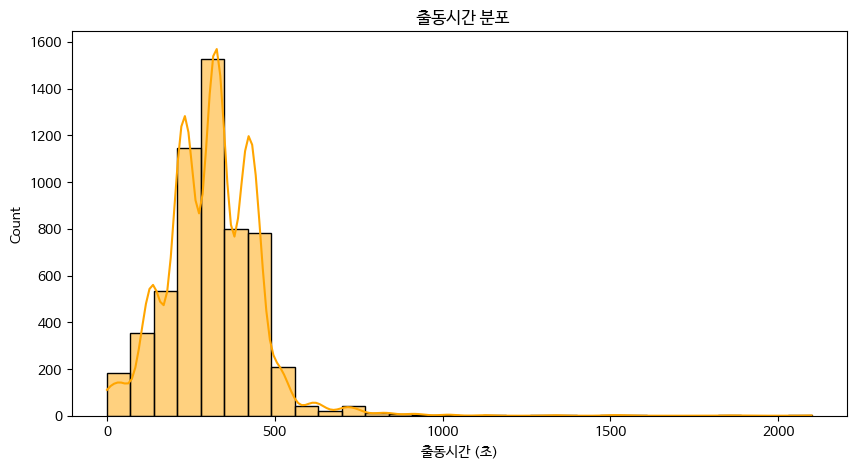

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


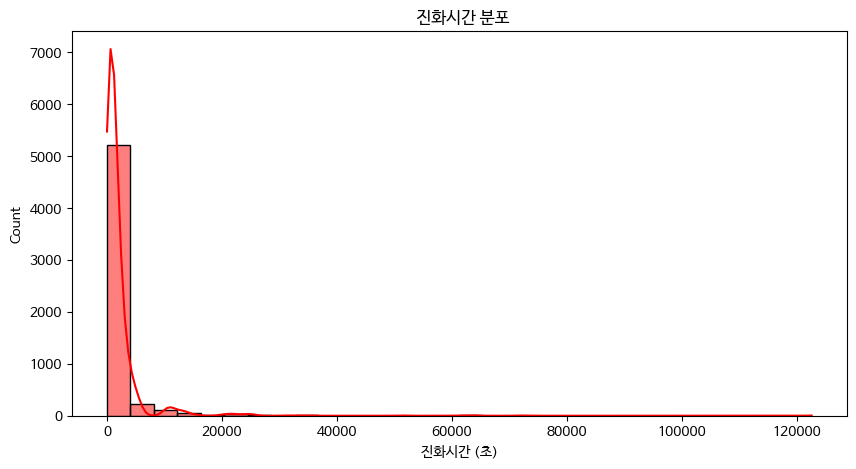

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# 데이터 불러오기
df = pd.read_csv('서울특별시_화재위험도분석용_전처리완료.csv')

# -------------------------------
# 1. 데이터 기본 정보 확인
# -------------------------------
print("📌 데이터프레임 정보")
print(df.info())
print("\n📌 기본 통계")
print(df.describe(include='all'))

# -------------------------------
# 2. 결측치 시각화 (확인용)
# -------------------------------
import missingno as msno

msno.matrix(df)
plt.title('결측치 확인 (서울특별시 화재 데이터)')
plt.show()

# -------------------------------
# 3. 지역별 화재 발생 수
# -------------------------------
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='시군구', order=df['시군구'].value_counts().index)
plt.title('📊 자치구별 화재 발생 건수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------
# 4. 월별 화재 발생 추이
# -------------------------------
df['월'] = pd.to_datetime(df['날짜']).dt.month
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='월')
plt.title('📈 월별 화재 발생 건수')
plt.xlabel('월')
plt.ylabel('건수')
plt.show()

# -------------------------------
# 5.인명피해와 재산피해에 대한 기술통계
# -------------------------------

cols = ['인명피해', '재산피해']
df[cols].describe()


# -------------------------------
# 6. 대응 시간 분석
# -------------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df['출동시간'], bins=30, kde=True, color='orange')
plt.title('🚒 출동시간 분포')
plt.xlabel('출동시간 (초)')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['진화시간'], bins=30, kde=True, color='red')
plt.title('🔥 진화시간 분포')
plt.xlabel('진화시간 (초)')
plt.show()


/tmp/ipython-input-8463923.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='flare')


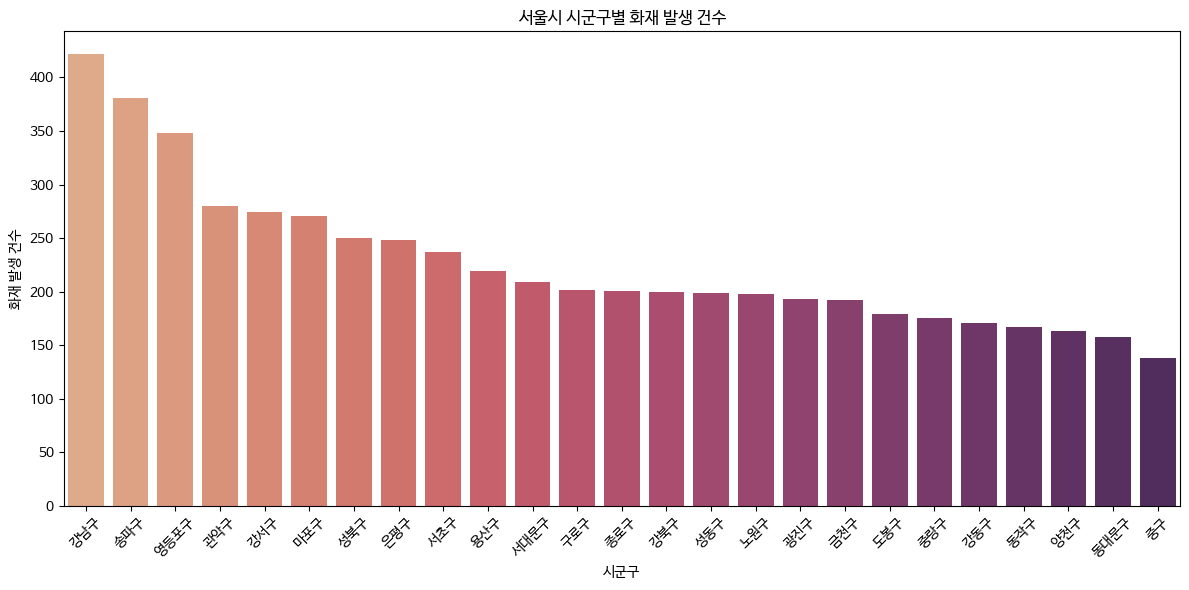

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 시군구 기준 화재 건수 집계
region_counts = df['시군구'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='flare')
plt.title('서울시 시군구별 화재 발생 건수')
plt.xlabel('시군구')
plt.ylabel('화재 발생 건수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


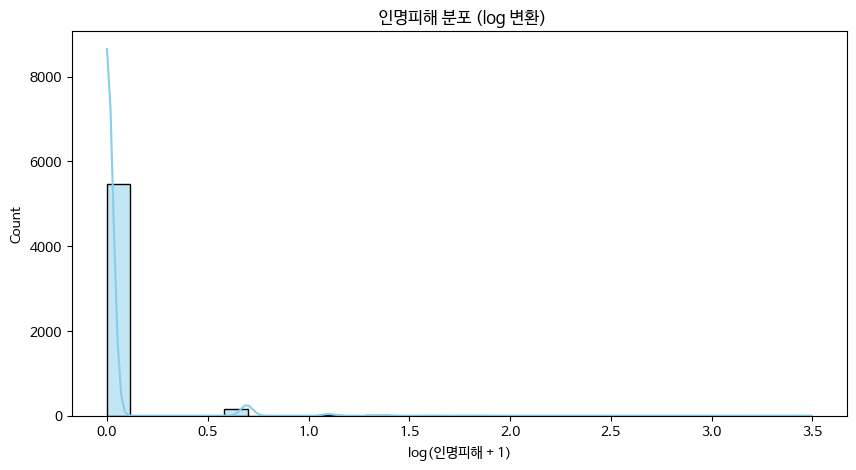

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


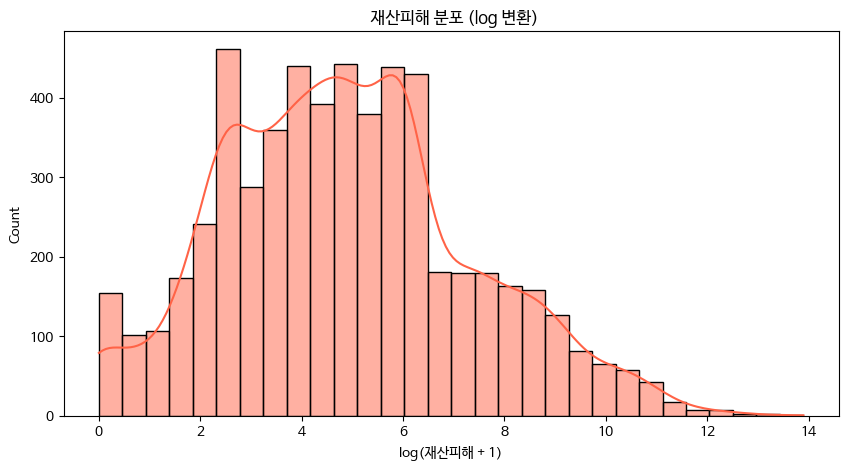

In [ ]:
# 1. 로그 변환 분포 시각화 -----------------------------
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(df['인명피해']), bins=30, kde=True, color='skyblue')
plt.title('🧍 인명피해 분포 (log 변환)')
plt.xlabel('log(인명피해 + 1)')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(df['재산피해']), bins=30, kde=True, color='tomato')
plt.title('💰 재산피해 분포 (log 변환)')
plt.xlabel('log(재산피해 + 1)')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


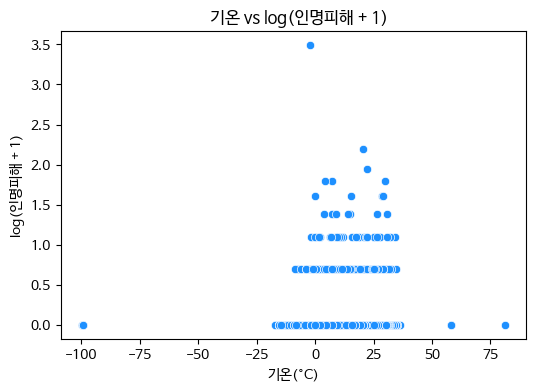

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


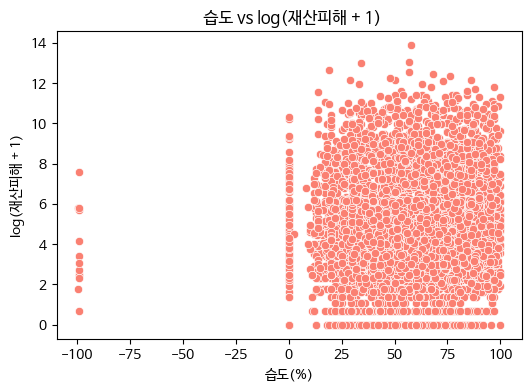

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127788 (\N{WIND BLOWING FACE}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


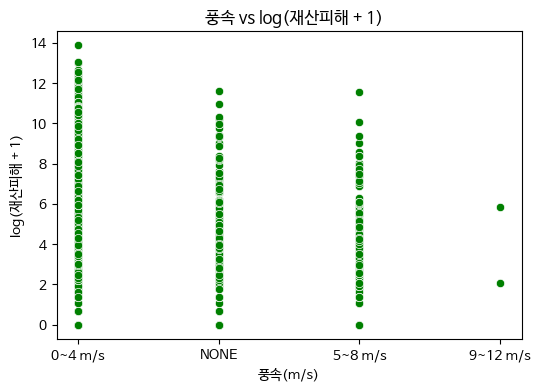

In [ ]:
# 2. 기온/습도/풍속과 피해 관계 (로그스케일) -----------------------------
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['기온'], y=np.log1p(df['인명피해']), color='dodgerblue')
plt.title('🌡️ 기온 vs log(인명피해 + 1)')
plt.xlabel('기온(°C)')
plt.ylabel('log(인명피해 + 1)')
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['습도'], y=np.log1p(df['재산피해']), color='salmon')
plt.title('💧 습도 vs log(재산피해 + 1)')
plt.xlabel('습도(%)')
plt.ylabel('log(재산피해 + 1)')
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['풍속'], y=np.log1p(df['재산피해']), color='green')
plt.title('🌬️ 풍속 vs log(재산피해 + 1)')
plt.xlabel('풍속(m/s)')
plt.ylabel('log(재산피해 + 1)')
plt.show()

/tmp/ipython-input-13009114.py:9: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


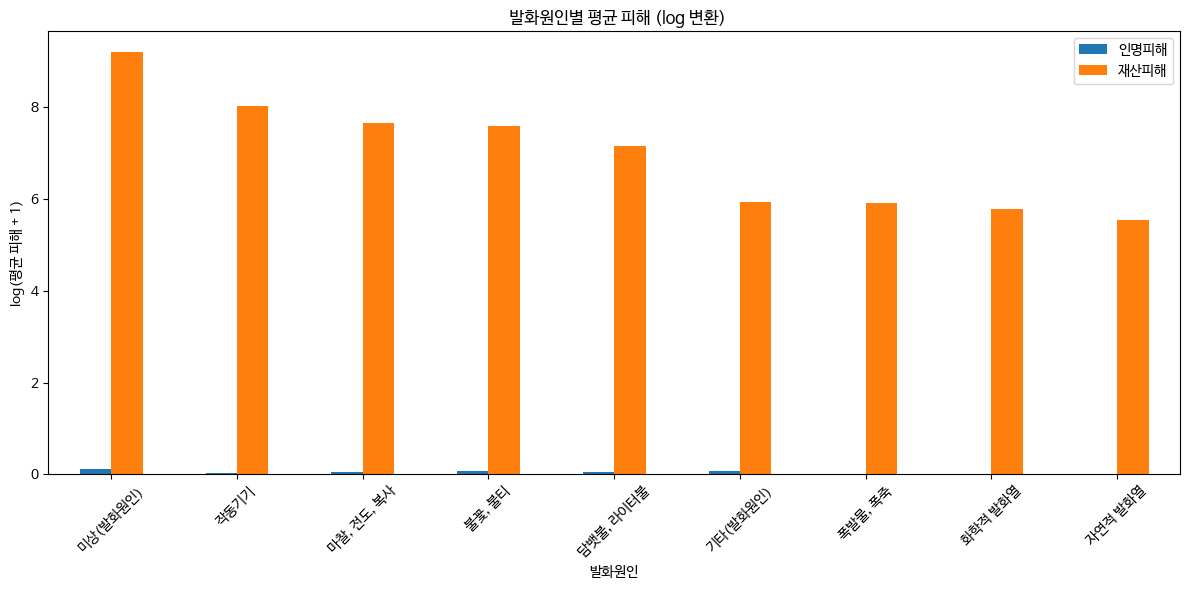

/tmp/ipython-input-13009114.py:19: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


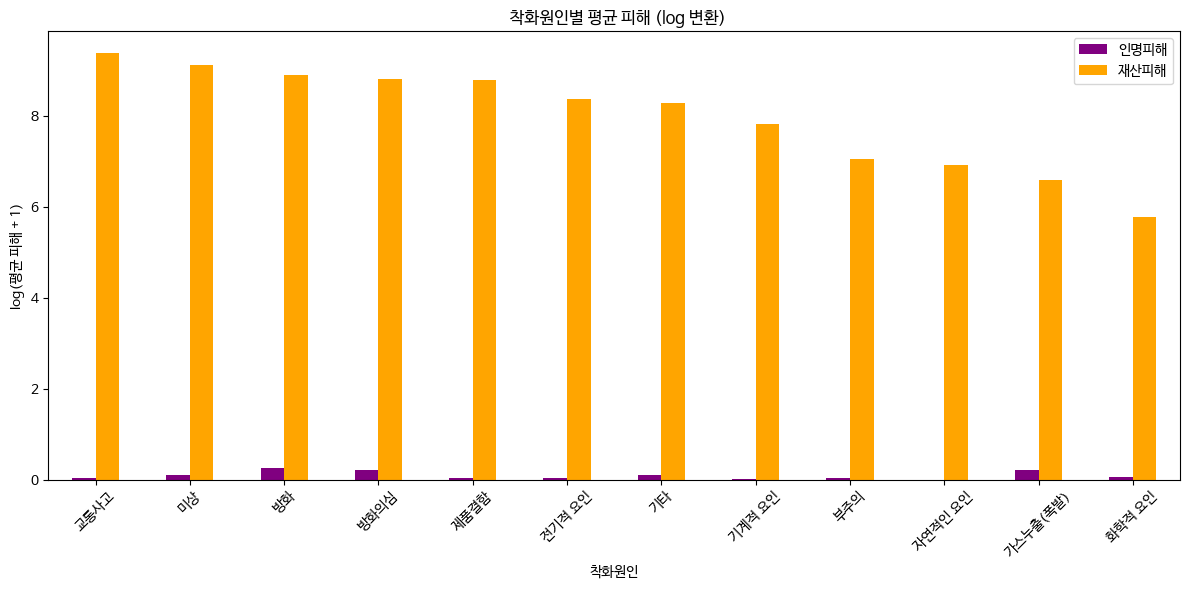

In [ ]:
# 3. 발화원인 / 착화원인별 평균 피해 -----------------------------
pivot1 = df.groupby('발화원인')[['인명피해', '재산피해']].mean()
pivot1['재산피해'] = np.log1p(pivot1['재산피해'])  # 로그 변환
pivot1['인명피해'] = np.log1p(pivot1['인명피해'])  # 로그 변환
pivot1.sort_values('재산피해', ascending=False).plot(kind='bar', figsize=(12,6))
plt.title('🔥 발화원인별 평균 피해 (log 변환)')
plt.ylabel('log(평균 피해 + 1)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

pivot2 = df.groupby('착화원인')[['인명피해', '재산피해']].mean()
pivot2['재산피해'] = np.log1p(pivot2['재산피해'])  # 로그 변환
pivot2['인명피해'] = np.log1p(pivot2['인명피해'])  # 로그 변환
pivot2.sort_values('재산피해', ascending=False).plot(kind='bar', figsize=(12,6), color=['purple', 'orange'])
plt.title('🔥 착화원인별 평균 피해 (log 변환)')
plt.ylabel('log(평균 피해 + 1)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


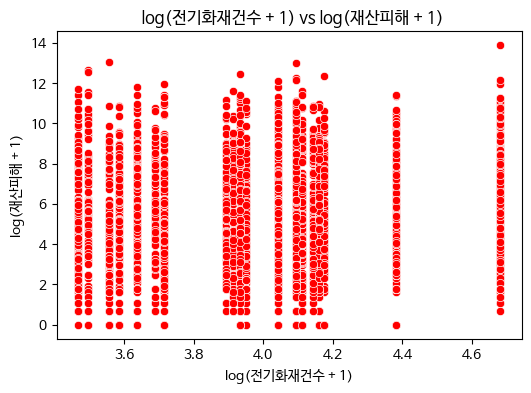

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


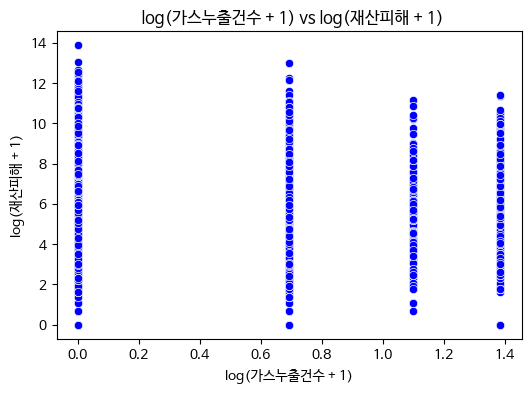

In [ ]:
# 4. 전기화재/가스누출 건수 vs 재산피해 -----------------------------
plt.figure(figsize=(6, 4))
sns.scatterplot(x=np.log1p(df['전기화재건수']), y=np.log1p(df['재산피해']), color='red')
plt.title('⚡ log(전기화재건수 + 1) vs log(재산피해 + 1)')
plt.xlabel('log(전기화재건수 + 1)')
plt.ylabel('log(재산피해 + 1)')
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=np.log1p(df['가스누출건수']), y=np.log1p(df['재산피해']), color='blue')
plt.title('🔥 log(가스누출건수 + 1) vs log(재산피해 + 1)')
plt.xlabel('log(가스누출건수 + 1)')
plt.ylabel('log(재산피해 + 1)')
plt.show()

/tmp/ipython-input-3388187087.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='풍향', data=df, ax=axs[1, 1], order=df['풍향'].value_counts().index, palette='Set2')
/tmp/ipython-input-3388187087.py:30: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/tmp/ipython-input-3388187087.py:30: UserWarning: Glyph 127788 (\N{WIND BLOWING FACE}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/tmp/ipython-input-3388187087.py:30: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/tmp/ipython-input-3388187087.py:30: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) mi

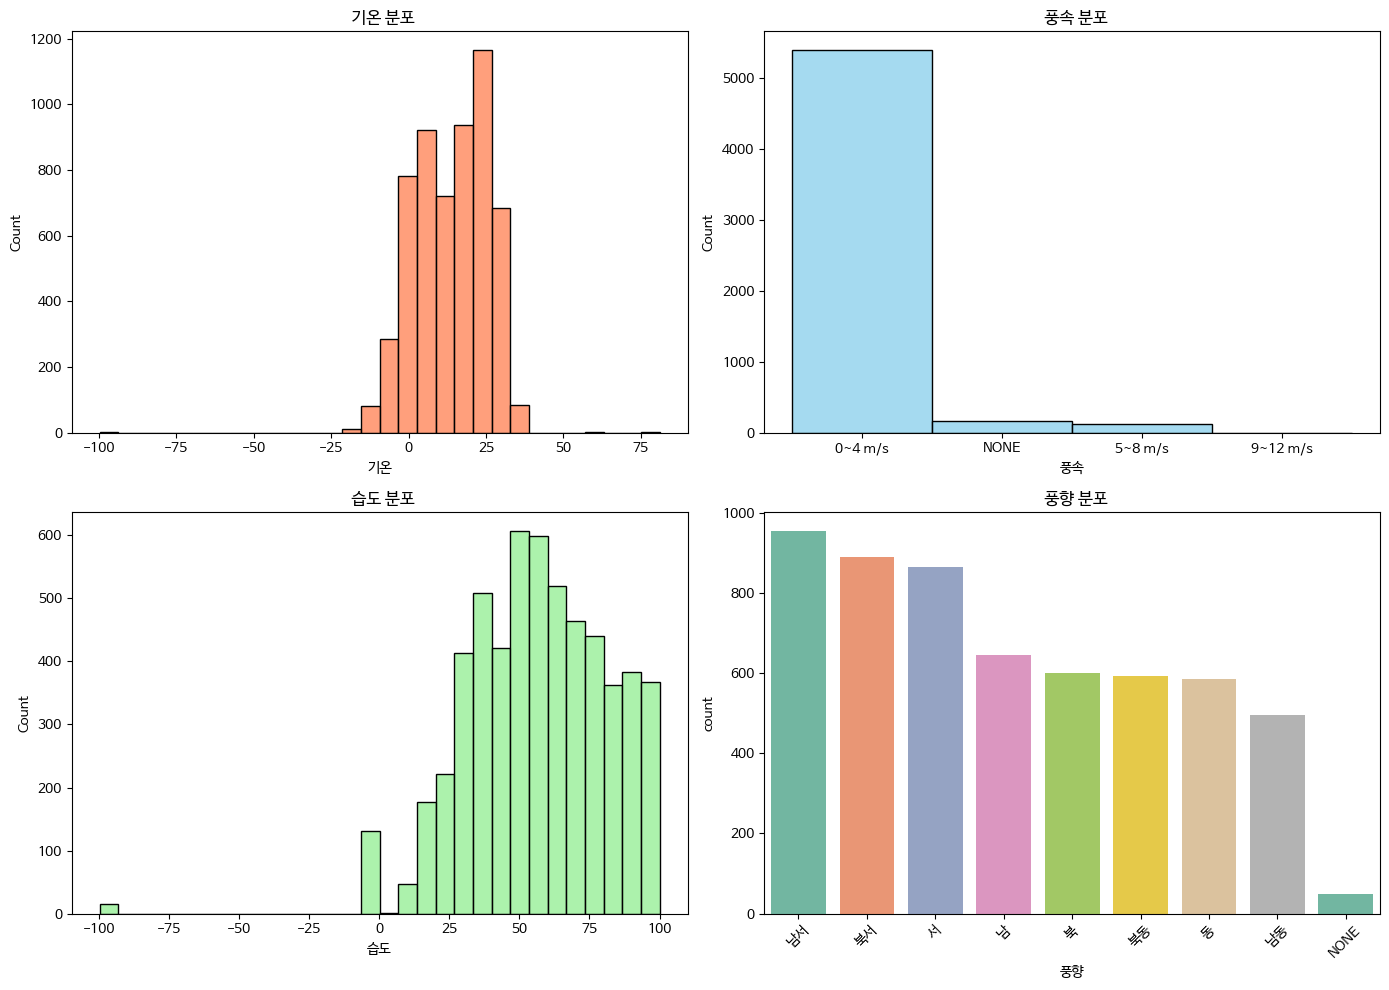

/tmp/ipython-input-3388187087.py:43: UserWarning: Glyph 128658 (\N{FIRE ENGINE}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/tmp/ipython-input-3388187087.py:43: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128658 (\N{FIRE ENGINE}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


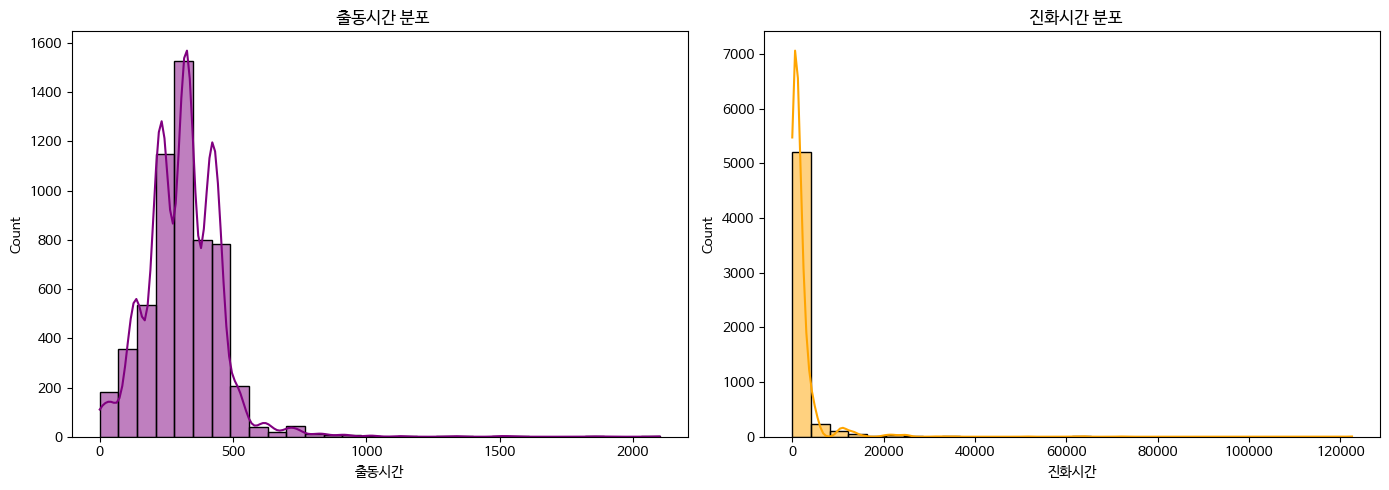

In [ ]:
# 기본 세팅
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')  # 한글폰트
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df = pd.read_csv("서울특별시_화재위험도분석용_전처리완료.csv")

# 1. 기상 요소 시각화 ----------------------

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['기온'], bins=30, ax=axs[0, 0], color='coral')
axs[0, 0].set_title("🌡 기온 분포")

sns.histplot(df['풍속'], bins=30, ax=axs[0, 1], color='skyblue')
axs[0, 1].set_title("🌬 풍속 분포")

sns.histplot(df['습도'], bins=30, ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title("💧 습도 분포")

sns.countplot(x='풍향', data=df, ax=axs[1, 1], order=df['풍향'].value_counts().index, palette='Set2')
axs[1, 1].set_title("🧭 풍향 분포")
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 2. 출동시간, 진화시간 분포 -----------------------

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['출동시간'], bins=30, kde=True, ax=axs[0], color='purple')
axs[0].set_title("🚒 출동시간 분포")

sns.histplot(df['진화시간'], bins=30, kde=True, ax=axs[1], color='orange')
axs[1].set_title("🔥 진화시간 분포")

plt.tight_layout()
plt.show()


/tmp/ipython-input-697672546.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted1, x='인명피해', y='시군구', palette='Reds_r')


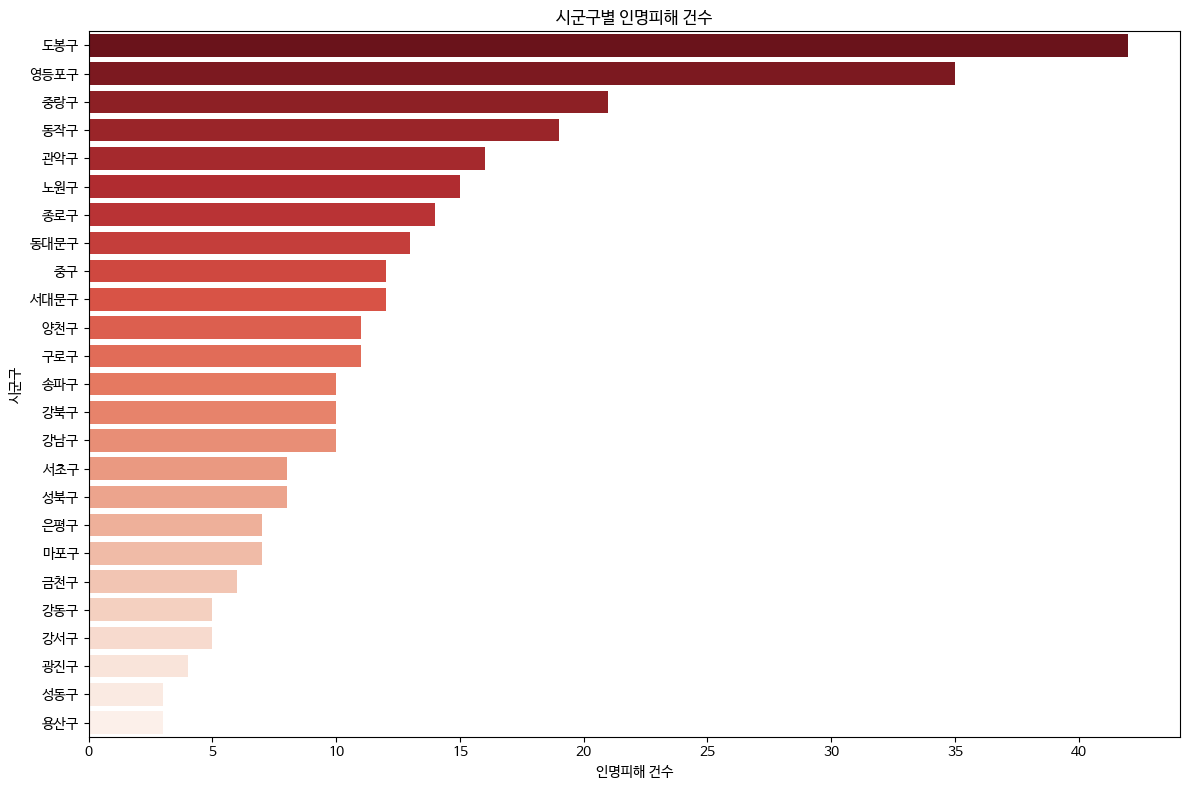

/tmp/ipython-input-697672546.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted2, x='화재건수', y='시군구', palette='Blues_r')


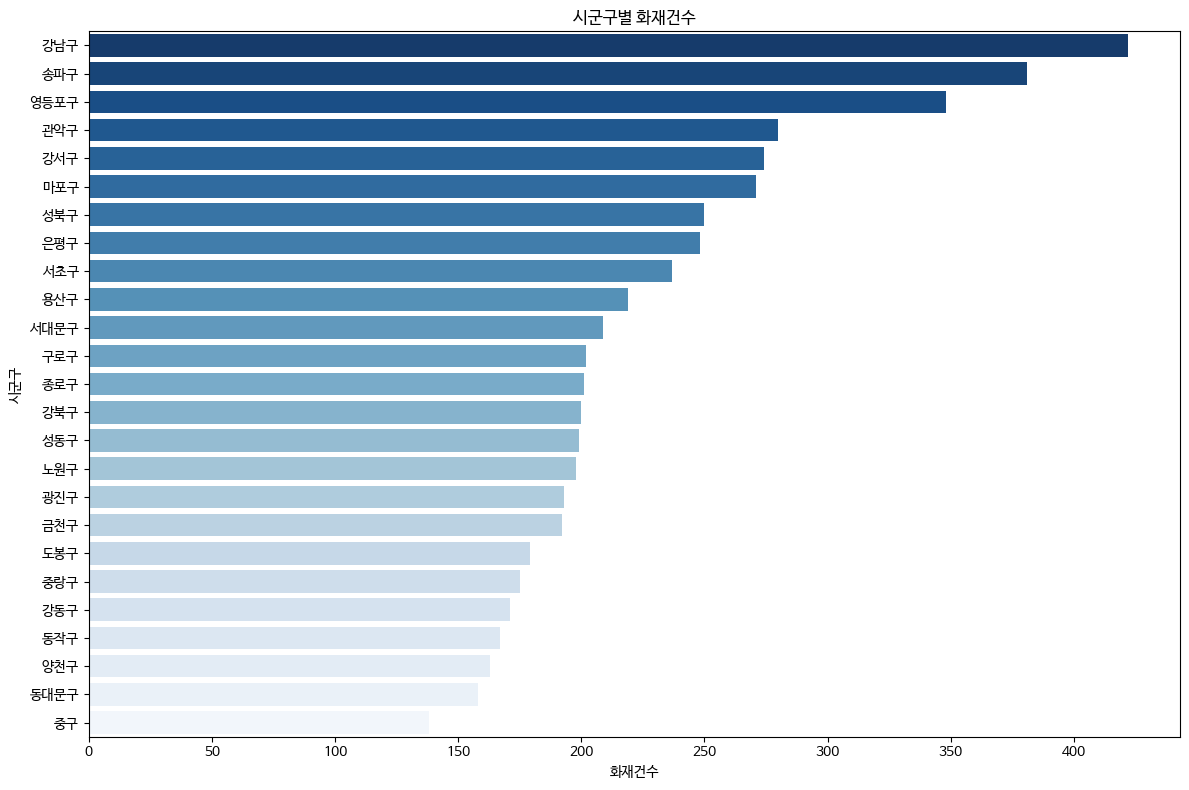

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df = pd.read_csv('서울특별시_화재위험도분석용_전처리완료.csv')

# NaN 값 처리
df['인명피해'] = df['인명피해'].fillna(0)

# 시군구별 인명피해 및 화재건수 집계
df_region = df.groupby('시군구').agg({
    '인명피해': 'sum',
    '시군구': 'count'   # 화재건수 = 행 수
}).rename(columns={'시군구': '화재건수'}).reset_index()

# 🔹 (1) 인명피해 차트
plt.figure(figsize=(12, 8))
df_sorted1 = df_region.sort_values(by='인명피해', ascending=False)
sns.barplot(data=df_sorted1, x='인명피해', y='시군구', palette='Reds_r')
plt.title('시군구별 인명피해 건수')
plt.xlabel('인명피해 건수')
plt.ylabel('시군구')
plt.tight_layout()
plt.show()

# 🔹 (2) 화재건수 차트
plt.figure(figsize=(12, 8))
df_sorted2 = df_region.sort_values(by='화재건수', ascending=False)
sns.barplot(data=df_sorted2, x='화재건수', y='시군구', palette='Blues_r')
plt.title('시군구별 화재건수')
plt.xlabel('화재건수')
plt.ylabel('시군구')
plt.tight_layout()
plt.show()


/tmp/ipython-input-800466245.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_result.head(10), x='위험도점수', y='시군구', palette='inferno')


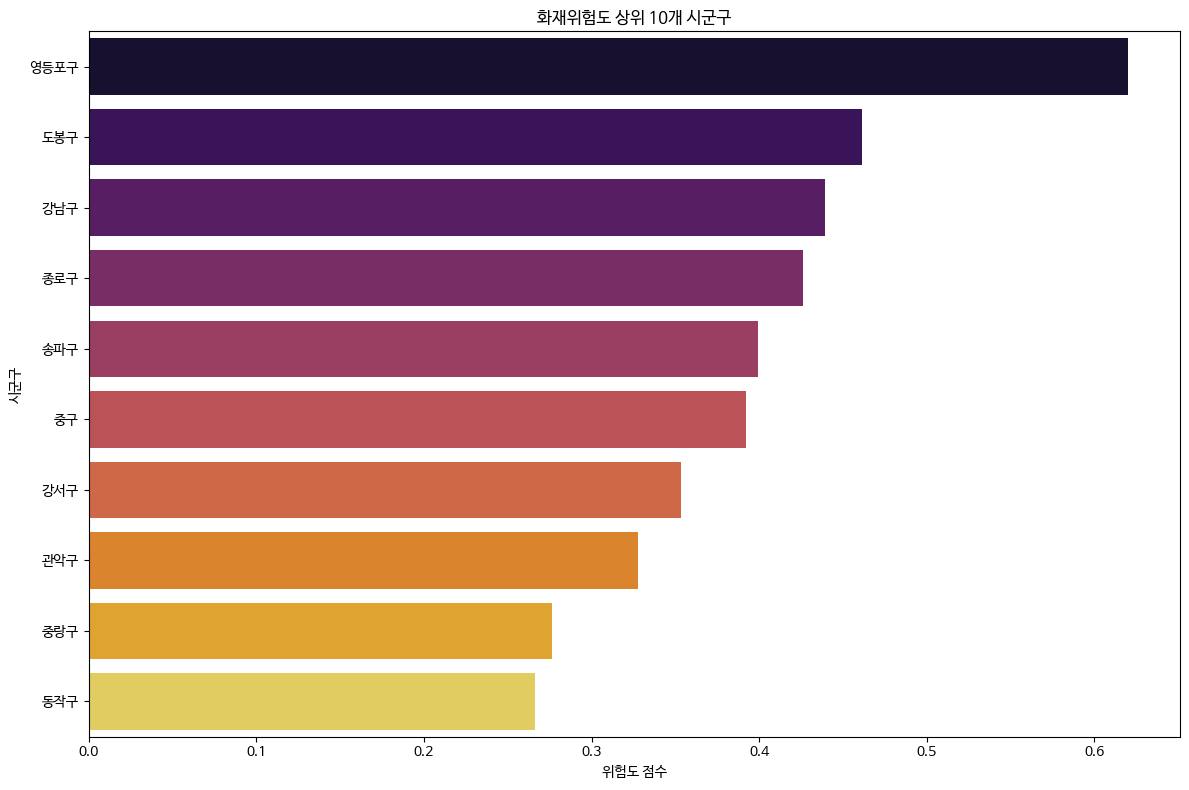

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 1. 대응시간 파생변수 생성 (출동시간 + 진화시간)
df['대응시간'] = df['출동시간'] + df['진화시간']

# 2. 시군구별 집계 (화재건수는 각 시군구에 해당하는 행 수)
df_score = df.groupby('시군구').agg({
    '인명피해': 'sum',
    '대응시간': 'mean',
    '시군구': 'count'  # 행 수 = 화재건수
}).rename(columns={'시군구': '화재건수'}).reset_index()

# 3. 정규화
scaler = MinMaxScaler()
df_scaled = df_score.copy()
df_scaled[['인명피해', '화재건수', '대응시간']] = scaler.fit_transform(df_scaled[['인명피해', '화재건수', '대응시간']])

# 4. 가중치 기반 위험도 점수 계산
df_scaled['위험도점수'] = (
    df_scaled['인명피해'] * 0.4 +
    df_scaled['화재건수'] * 0.3 +
    df_scaled['대응시간'] * 0.3
)

# 5. 점수 높은 상위 10개 시군구 시각화
df_result = df_scaled.sort_values(by='위험도점수', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=df_result.head(10), x='위험도점수', y='시군구', palette='inferno')
plt.title('화재위험도 상위 10개 시군구')
plt.xlabel('위험도 점수')
plt.ylabel('시군구')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("서울특별시_화재위험도분석용_전처리완료.csv")

# 1. 서울 시군구 목록만 추출
seoul_gus = df[df['시도'] == '서울특별시']['시군구'].unique()
seoul_gus.sort()
# 1-1. 대응시간 파생변수 생성 (출동시간 + 진화시간)
df['대응시간'] = df['출동시간'] + df['진화시간']

# 2. 시군구 리스트 출력
print("✅ 조회 가능한 시군구 목록 (서울특별시):")
for gu in seoul_gus:
    print(" -", gu)

# 3. 사용자 입력
print("\n예: 강남구, 종로구, 은평구 등 중에서 입력하세요.")
target_gu = input("\n🔍 조회할 시군구를 입력하세요: ").strip()

# 입력 유효성 검사
if target_gu not in seoul_gus:
    print(f"\n❌ '{target_gu}'는 올바른 시군구가 아닙니다. 프로그램을 종료합니다.")
else:
    # 4. 해당 시군구 데이터 필터링
    gu_df = df[df['시군구'] == target_gu]

    # 5. 각 항목 계산
    total_fires = gu_df.shape[0]
    avg_response_time = gu_df['대응시간'].mean()
    avg_casualties = gu_df['인명피해'].mean()

    # 서울시 전체 평균
    seoul_df = df[df['시도'] == '서울특별시']
    seoul_avg_response = seoul_df['대응시간'].mean()
    seoul_avg_casualties = seoul_df['인명피해'].mean()
    seoul_avg_fires = seoul_df.groupby('시군구').size().mean()

    # 6. 위험도 점수 계산
    risk_score = 0
    if avg_response_time > seoul_avg_response:
        risk_score += 1
    if avg_casualties > seoul_avg_casualties:
        risk_score += 1
    if total_fires > seoul_avg_fires:
        risk_score += 1

    # 7. 가이드 추천
    if risk_score == 0:
        guide = "🔥 매우 안전한 지역입니다. 평소와 같이 주의하세요."
    elif risk_score == 1:
        guide = "⚠️ 주의가 필요한 지역입니다. 가정 내 소방 점검을 권장합니다."
    elif risk_score == 2:
        guide = "🚨 화재 위험이 높은 지역입니다. 소화기 및 화재감지기 점검 필수!"
    else:
        guide = "🧯 매우 위험한 지역입니다. 비상 대피로와 소방 안전계획을 숙지하세요."

    # 8. 출력
    print(f"\n📍 [{target_gu}] 지역 화재 정보 요약:")
    print(f"- 총 화재 건수: {total_fires}건")
    print(f"- 평균 대응시간: {avg_response_time:.2f}분 (서울 평균: {seoul_avg_response:.2f}분)")
    print(f"- 평균 인명피해: {avg_casualties:.2f}명 (서울 평균: {seoul_avg_casualties:.2f}명)")
    print(f"- 화재 위험도 점수: {risk_score} / 3")
    print(f"- 🔎 행동 가이드: {guide}")


✅ 조회 가능한 시군구 목록 (서울특별시):
 - 강남구
 - 강동구
 - 강북구
 - 강서구
 - 관악구
 - 광진구
 - 구로구
 - 금천구
 - 노원구
 - 도봉구
 - 동대문구
 - 동작구
 - 마포구
 - 서대문구
 - 서초구
 - 성동구
 - 성북구
 - 송파구
 - 양천구
 - 영등포구
 - 용산구
 - 은평구
 - 종로구
 - 중구
 - 중랑구

예: 강남구, 종로구, 은평구 등 중에서 입력하세요.

🔍 조회할 시군구를 입력하세요: 종로구

📍 [종로구] 지역 화재 정보 요약:
- 총 화재 건수: 201건
- 평균 대응시간: 4269.72분 (서울 평균: 2270.39분)
- 평균 인명피해: 0.07명 (서울 평균: 0.05명)
- 화재 위험도 점수: 2 / 3
- 🔎 행동 가이드: 🚨 화재 위험이 높은 지역입니다. 소화기 및 화재감지기 점검 필수!


In [ ]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("서울특별시_화재위험도분석용_전처리완료.csv")

# 대응시간 계산
df['대응시간'] = df['출동시간'] + df['진화시간']

# 서울특별시 내 읍면동 목록
seoul_dongs = df[df['시도'] == '서울특별시']['읍면동'].dropna().unique()
seoul_dongs.sort()

# 읍면동 목록 출력
print("✅ 조회 가능한 읍면동 목록 (서울특별시):")
for dong in seoul_dongs:
    print(" -", dong)

# 사용자 입력
target_dong = input("\n🔍 조회할 '읍면동'을 입력하세요: ").strip()

# 유효성 검사
if target_dong not in seoul_dongs:
    print(f"\n❌ '{target_dong}'는 유효한 읍면동이 아닙니다. 프로그램을 종료합니다.")
else:
    # 대상 읍면동 데이터 필터링
    dong_df = df[df['읍면동'] == target_dong]

    # 기본 통계
    total_fires = dong_df.shape[0]
    avg_dispatch = dong_df['출동시간'].mean()
    avg_suppression = dong_df['진화시간'].mean()
    avg_response = dong_df['대응시간'].mean()
    total_casualties = dong_df['인명피해'].sum()

    # 전체 평균 기반 정규화
    seoul_df = df[df['시도'] == '서울특별시']

    # 지표별 전체 통계
    mean_fires = seoul_df.groupby('읍면동').size().median()
    mean_casualties = seoul_df.groupby('읍면동')['인명피해'].sum().median()
    mean_response = seoul_df.groupby('읍면동')['대응시간'].mean().median()

    # 정규화 점수 (0~1)
    norm_fires = min(total_fires / (mean_fires + 1e-5), 2.0)
    norm_casualties = min(total_casualties / (mean_casualties + 1e-5), 2.0)
    norm_response = min(avg_response / (mean_response + 1e-5), 2.0)

    # 가중치 적용 점수 (0~2 범위)
    raw_score = (
        norm_casualties * 0.6 +
        norm_fires * 0.2 +
        norm_response * 0.2
    )

    # 최종 정규화 (0~5 범위)
    normalized_score = min((raw_score / 2) * 5, 5)
    star_score = int(round(normalized_score))
    stars = "★" * star_score + "☆" * (5 - star_score)

    # 서울 평균 점수 산출
    all_scores = []
    for name, group in seoul_df.groupby('읍면동'):
        f = group.shape[0]
        c = group['인명피해'].sum()
        r = group['대응시간'].mean()

        nf = min(f / (mean_fires + 1e-5), 2.0)
        nc = min(c / (mean_casualties + 1e-5), 2.0)
        nr = min(r / (mean_response + 1e-5), 2.0)

        score = (nc * 0.6 + nf * 0.2 + nr * 0.2)
        all_scores.append((score / 2) * 5)

    seoul_avg_score = sum(all_scores) / len(all_scores)
    risk_diff_pct = ((normalized_score - seoul_avg_score) / seoul_avg_score) * 100

    # 가이드 출력
    if normalized_score < 1.5:
        guide = "🔥 매우 안전한 지역입니다. 평소와 같이 주의하세요."
    elif normalized_score < 2.5:
        guide = "⚠️ 주의가 필요한 지역입니다. 가정 내 소방 점검을 권장합니다."
    elif normalized_score < 3.5:
        guide = "🚨 화재 위험이 높은 지역입니다. 소화기 및 화재감지기 점검 필수!"
    else:
        guide = "🧯 매우 위험한 지역입니다. 비상 대피로와 소방 안전계획을 숙지하세요."

    # 결과 출력
    print(f"\n📍 [{target_dong} 화재 위험도 리포트]\n")
    print(f"✅ 전체 화재건수: {total_fires}건")
    print(f"✅ 인명피해: {int(total_casualties)}명")
    print(f"✅ 평균 출동시간: {int(avg_dispatch)}초")
    print(f"✅ 평균 진화시간: {int(avg_suppression)}초")
    print(f"✅ 평균 대응시간: {int(avg_response)}초")
    print(f"✅ 위험도 점수: {normalized_score:.1f} / 5.0 {stars}")
    print(f"\n📊 서울 평균보다 화재 위험도가 {abs(risk_diff_pct):.1f}% {'높습니다' if risk_diff_pct > 0 else '낮습니다'}.\n")
    print(f"🛡️ 예방 행동 가이드:\n- {guide}")


✅ 조회 가능한 읍면동 목록 (서울특별시):
 - 가락동
 - 가리봉동
 - 가산동
 - 가양동
 - 갈월동
 - 갈현동
 - 강일동
 - 개봉동
 - 개포동
 - 개화동
 - 거여동
 - 경운동
 - 계동
 - 고덕동
 - 고척동
 - 공덕동
 - 공릉동
 - 공항동
 - 관철동
 - 관훈동
 - 광장동
 - 광희동2가
 - 구기동
 - 구로동
 - 구산동
 - 구수동
 - 구의동
 - 군자동
 - 궁동
 - 권농동
 - 금호동1가
 - 금호동2가
 - 길동
 - 길음동
 - 낙원동
 - 남가좌동
 - 남대문로2가
 - 남산동1가
 - 남영동
 - 남창동
 - 남현동
 - 내곡동
 - 내발산동
 - 내수동
 - 냉천동
 - 노고산동
 - 노량진동
 - 녹번동
 - 논현동
 - 누상동
 - 누하동
 - 능동
 - 다동
 - 답십리동
 - 당산동
 - 당산동1가
 - 당산동2가
 - 당산동3가
 - 당산동4가
 - 당산동5가
 - 당산동6가
 - 당주동
 - 대림동
 - 대방동
 - 대신동
 - 대조동
 - 대치동
 - 대현동
 - 대흥동
 - 도곡동
 - 도림동
 - 도봉동
 - 도선동
 - 도원동
 - 도화동
 - 독산동
 - 돈암동
 - 돈의동
 - 동교동
 - 동빙고동
 - 동선동1가
 - 동선동2가
 - 동선동3가
 - 동선동4가
 - 동선동5가
 - 동소문동1가
 - 동소문동4가
 - 동소문동5가
 - 동숭동
 - 동자동
 - 동작동
 - 둔촌동
 - 등촌동
 - 마곡동
 - 마장동
 - 마천동
 - 마포동
 - 만리동1가
 - 망우동
 - 망원동
 - 면목동
 - 명동2가
 - 명륜1가
 - 명륜3가
 - 명륜4가
 - 명일동
 - 목동
 - 묘동
 - 무교동
 - 무악동
 - 묵동
 - 문래동1가
 - 문래동2가
 - 문래동3가
 - 문래동4가
 - 문래동5가
 - 문래동6가
 - 문정동
 - 미아동
 - 반포동
 - 방배동
 - 방산동
 - 방이동
 - 방학동
 - 방화동
 - 번동
 - 보광동
 - 보문동2가
 - 보문동4가
 - 보문동5가
 

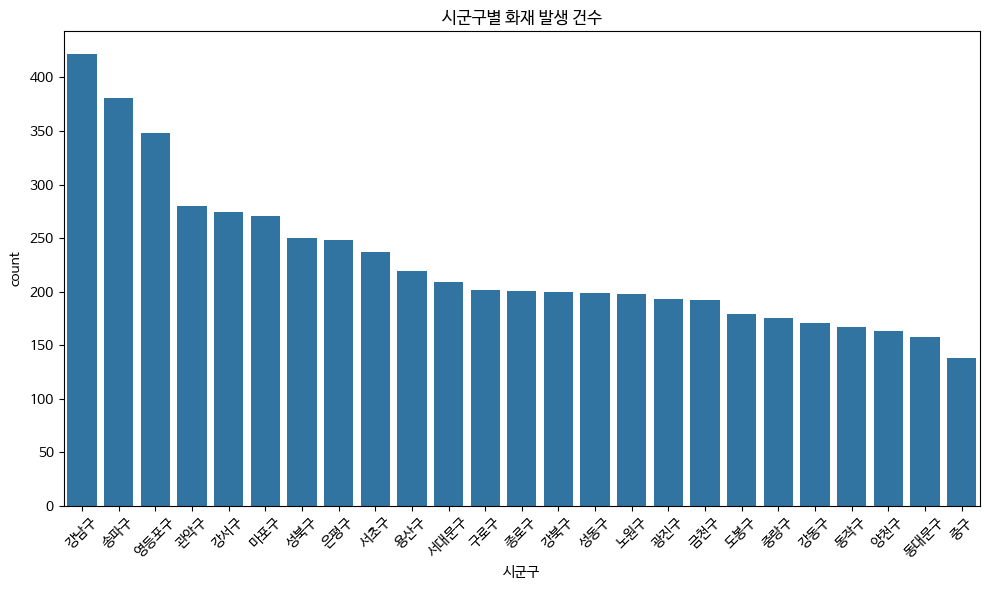

In [ ]:
# 시군구별 화재 발생 건수
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='시군구', order=df['시군구'].value_counts().index)
plt.title('시군구별 화재 발생 건수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('chart1_시군구별_화재건수.png', dpi=300)
plt.show()



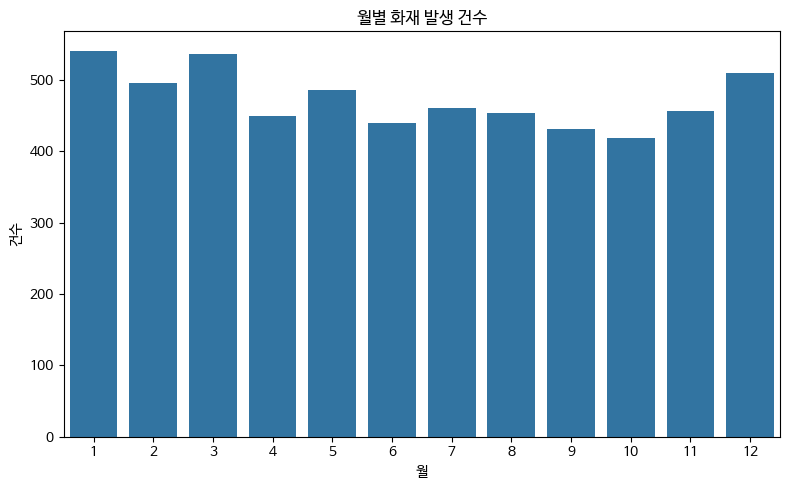

In [ ]:
# 월 별 화재건수
df['월'] = pd.to_datetime(df['날짜']).dt.month
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='월')
plt.title('월별 화재 발생 건수')
plt.xlabel('월')
plt.ylabel('건수')
plt.tight_layout()
plt.savefig('chart2_월별_화재건수.png', dpi=300)
plt.show()


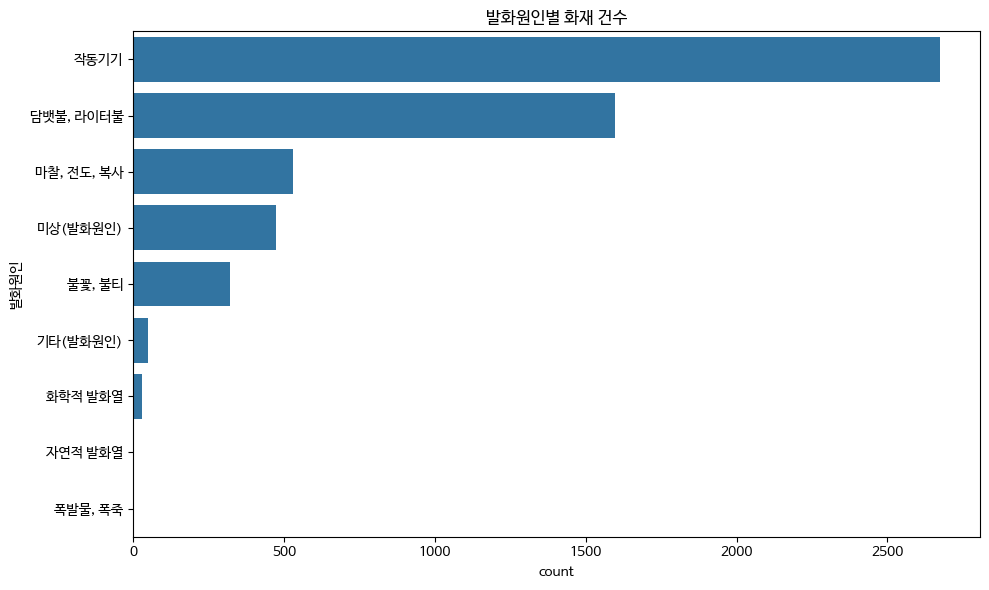

In [ ]:
# 발화 원인 별
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='발화원인', order=df['발화원인'].value_counts().index)
plt.title('발화원인별 화재 건수')
plt.tight_layout()
plt.savefig('chart3_발화원인별_분포.png', dpi=300)
plt.show()


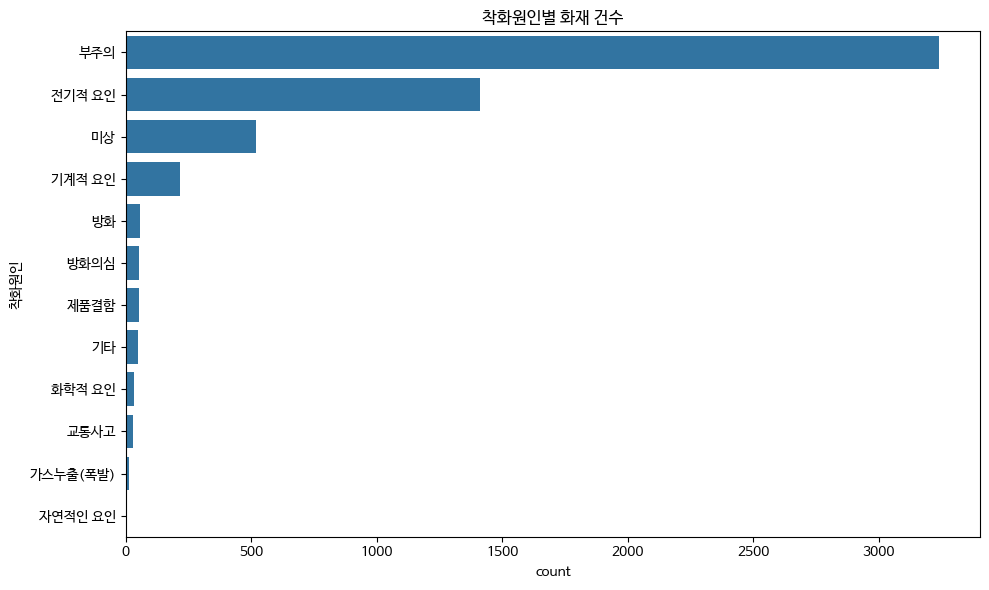

In [ ]:
# 착화 원인 별
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='착화원인', order=df['착화원인'].value_counts().index)
plt.title('착화원인별 화재 건수')
plt.tight_layout()
plt.savefig('chart4_착화원인별_분포.png', dpi=300)
plt.show()


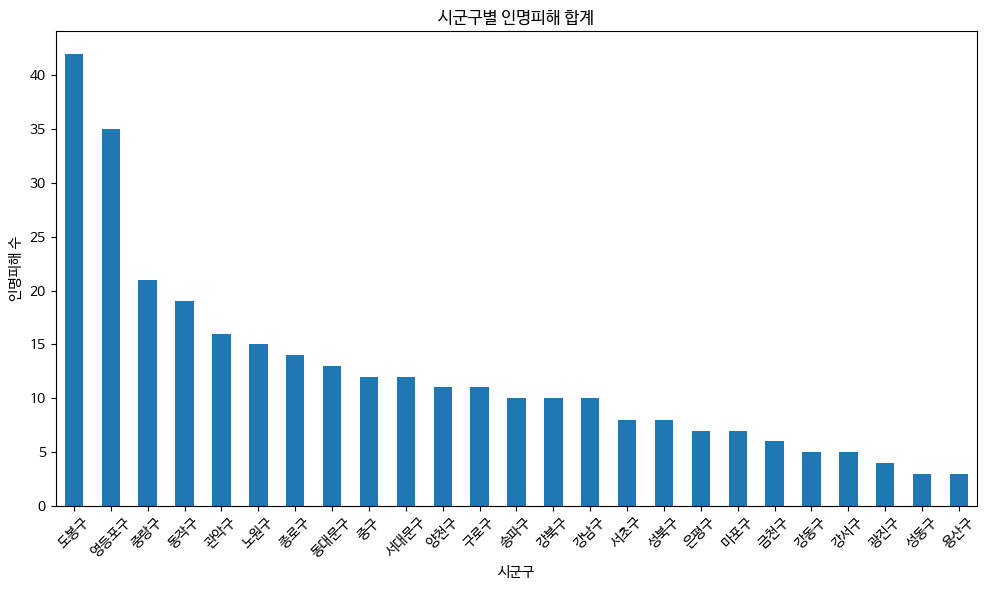

In [ ]:
# 시군구별 인명 피해
plt.figure(figsize=(10, 6))
df.groupby('시군구')['인명피해'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('시군구별 인명피해 합계')
plt.ylabel('인명피해 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('chart5_시군구별_인명피해.png', dpi=300)
plt.show()


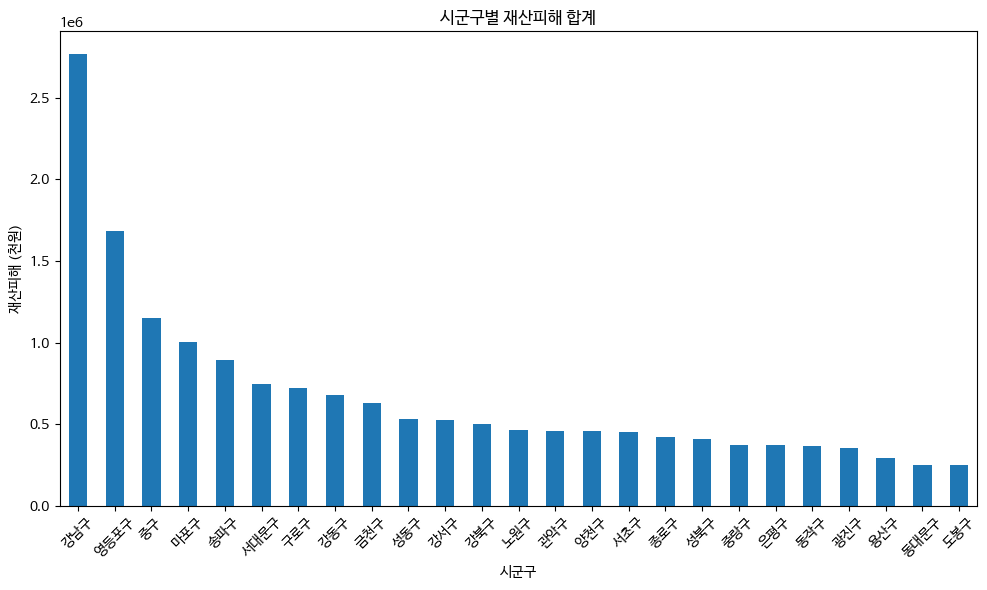

In [ ]:
# 시군구별 재산 피해
plt.figure(figsize=(10, 6))
df.groupby('시군구')['재산피해'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('시군구별 재산피해 합계')
plt.ylabel('재산피해 (천원)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('chart6_시군구별_재산피해.png', dpi=300)
plt.show()


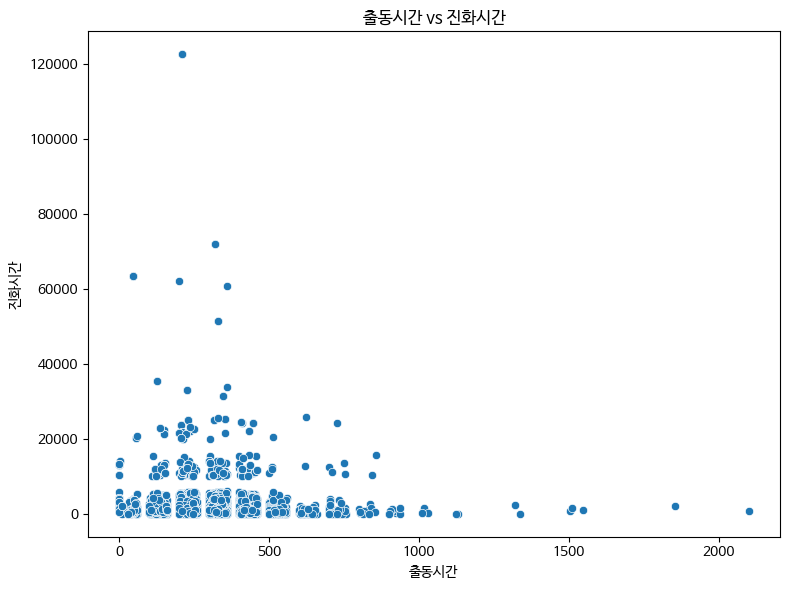

In [ ]:
# 출동시간 vs 진화시간 산점도
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='출동시간', y='진화시간')
plt.title('출동시간 vs 진화시간')
plt.tight_layout()
plt.savefig('chart7_출동시간_진화시간_산점도.png', dpi=300)
plt.show()


/tmp/ipython-input-3991051233.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='화재위험점수', y='읍면동', data=top10, palette='Reds_r')


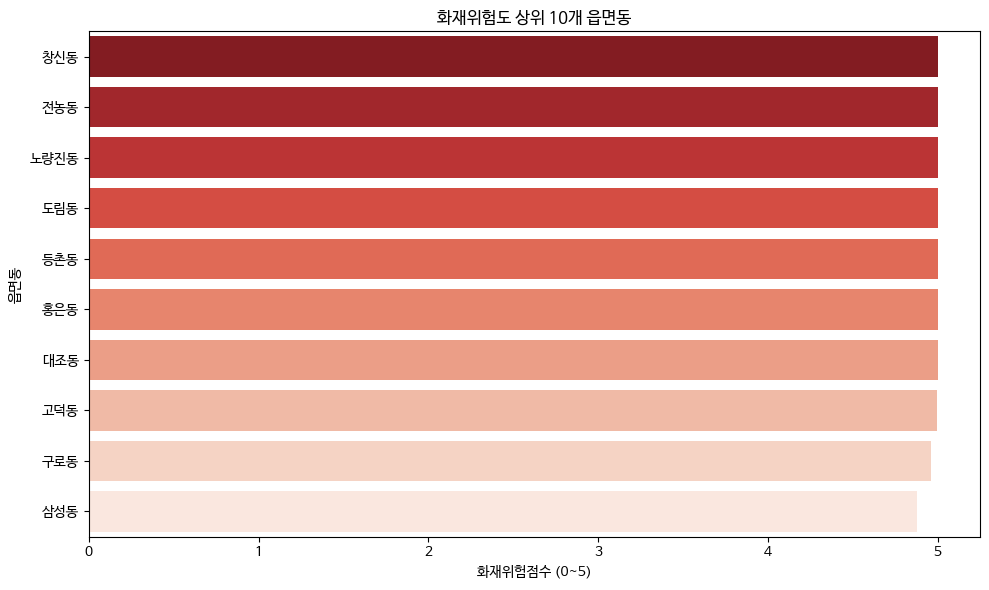

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv("서울특별시_화재위험도분석용_전처리완료.csv")

# 대응시간 계산
df['대응시간'] = df['출동시간'] + df['진화시간']

# 서울특별시 필터링
seoul_df = df[df['시도'] == '서울특별시']

# 전체 지표 중앙값 계산 (정규화 기준)
mean_fires = seoul_df.groupby('읍면동').size().median()
mean_casualties = seoul_df.groupby('읍면동')['인명피해'].sum().median()
mean_response = seoul_df.groupby('읍면동')['대응시간'].mean().median()

# 읍면동별 점수 계산
score_list = []
for name, group in seoul_df.groupby('읍면동'):
    total_fires = group.shape[0]
    total_casualties = group['인명피해'].sum()
    avg_response = group['대응시간'].mean()

    norm_fires = min(total_fires / (mean_fires + 1e-5), 2.0)
    norm_casualties = min(total_casualties / (mean_casualties + 1e-5), 2.0)
    norm_response = min(avg_response / (mean_response + 1e-5), 2.0)

    raw_score = (norm_casualties * 0.6 + norm_fires * 0.2 + norm_response * 0.2)
    final_score = min((raw_score / 2) * 5, 5)  # 0~5 범위

    score_list.append({
        '읍면동': name,
        '화재건수': total_fires,
        '인명피해': total_casualties,
        '대응시간': avg_response,
        '화재위험점수': final_score
    })

# 데이터프레임으로 변환
score_df = pd.DataFrame(score_list)

# 점수 기준 상위 10개 추출
top10 = score_df.sort_values(by='화재위험점수', ascending=False).head(10)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='화재위험점수', y='읍면동', data=top10, palette='Reds_r')
plt.title('화재위험도 상위 10개 읍면동')
plt.xlabel('화재위험점수 (0~5)')
plt.ylabel('읍면동')
plt.tight_layout()
plt.savefig("화재위험도_상위10읍면동.png", dpi=300)
plt.show()
